# 7章 ロジスティクスネットワークの最適設計を行う10本ノック

ここでは、最適化計算を行ういくつかのライブラリを用いて、最適化計算を実際に行っていきます。  
そして、前章で用いたネットワーク可視化などの技術を駆使し、計算結果の妥当性を確認する方法についても学んでいきます。

### ノック６１：輸送最適化問題を解いてみよう

In [1]:
import numpy as np
import pandas as pd
from itertools import product
from pulp import LpVariable, lpSum, value
from ortoolpy import model_min, addbinvars, addvals

df_tc = pd.read_csv("trans_cost.csv", index_col="工場")
df_demand = pd.read_csv("demand.csv")
df_supply = pd.read_csv("supply.csv")

np.random.seed(1)
nw = len(df_tc.index)
nf = len(df_tc.columns)
pr = list(product(range(nw), range(nf)))

m1 = model_min()
v1 = {(i,j):LpVariable('v%d_%d'%(i,j), lowBound=0) for i,j in pr}

m1 += lpSum(df_tc.iloc[i][j]*v1[i,j] for i,j in pr)
for i in range(nw):
    m1 += lpSum(v1[i,j] for j in range(nf)) <= df_supply.iloc[0][i]
for j in range(nf):
    m1 += lpSum(v1[i,j] for i in range(nw)) >= df_demand.iloc[0][j]
m1.solve()

df_tr_sol = df_tc.copy()
total_cost = 0
for k,x in v1.items():
    i,j = k[0],k[1]
    df_tr_sol.iloc[i][j] = value(x)
    total_cost += df_tc.iloc[i][j]*value(x)

print(total_cost)
print("総輸送コスト："+str(total_cost))


1296.0
総輸送コスト：1296.0


### ノック６２：最適輸送ルートをネットワークで確認しよう

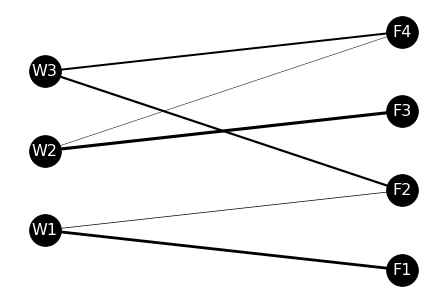

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

df_tr = df_tr_sol.copy()
df_pos = pd.read_csv("trans_route_pos.csv")

G = nx.Graph()

for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])

num_pre = 0
edge_weights = []
size = 0.1
for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i == j):
            G.add_edge(df_pos.columns[i],df_pos.columns[j])
            if num_pre < len(G.edges):
                num_pre = len(G.edges)
                weight = 0
                if (df_pos.columns[i] in df_tr.columns) and (df_pos.columns[j] in df_tr.index):
                    if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
                        weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
                elif (df_pos.columns[j] in df_tr.columns) and (df_pos.columns[i] in df_tr.index):
                    if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
                        weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
                edge_weights.append(weight)
                

pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0],df_pos[node][1])
    
nx.draw(G, pos, with_labels=True, font_size=16, node_size = 1000, node_color="k", font_color="w", width=edge_weights)

plt.show()

### ノック６３：最適輸送ルートが制約条件内に収まっているかどうかを確認しよう

In [3]:
import pandas as pd
import numpy as np

df_demand = pd.read_csv("demand.csv")
df_supply = pd.read_csv("supply.csv")

def condition_demand(df_tr, df_demand):
    flag = np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if (temp_sum >= df_demand.iloc[0][i]):
            flag[i] = 1
    return flag 

def condition_supply(df_tr, df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if temp_sum <= df_supply.iloc[0][i]:
            flag[i] = 1
    return flag 

print("需要条件計算結果：" + str(condition_demand(df_tr_sol, df_demand)))
print("供給条件計算結果：" + str(condition_supply(df_tr_sol, df_supply)))

需要条件計算結果：[1. 1. 1. 1.]
供給条件計算結果：[1. 1. 1.]


### ノック６４：生産計画に関するデータを読み込んでみよう

### ノック６５：利益を計算する関数を作ってみよう

### ノック６６：生産最適化問題を解いてみよう

### ノック６７：最適生産計画が制約条件内に収まっているかどうかを確認しよう

### ノック６８：ロジスティクスネットワーク設計問題を解いてみよう

### ノック６９：最適ネットワークにおける輸送コストとその内訳を計算しよう

### ノック７０：最適ネットワークにおける生産コストとその内訳を計算しよう